In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
import numpy as np
import time

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[] for _ in range(vertices)]
    
    def add_edge(self, u, v):
        if v not in self.graph[u] and u != v:
            self.graph[u].append(v)
            self.graph[v].append(u)
    
    def print_graph(self):
        for i in range(self.V):
            print(f"{i} --> {' '.join(map(str, self.graph[i]))}")

def generate_uniform(graph, E):
    added_edges = set()
    while E > 0:
        u, v = random.randint(0, graph.V - 1), random.randint(0, graph.V - 1)
        if u != v and (u, v) not in added_edges and (v, u) not in added_edges:
            graph.add_edge(u, v)
            added_edges.add((u, v))
            E -= 1

def generate_skewed(graph, E):
    added_edges = set()
    while E > 0:
        u, v = int(graph.V * (1 - np.sqrt(1 - random.uniform(0, 1)))), int(graph.V * (1 - np.sqrt(1 - random.uniform(0, 1))))
        if u != v and (u, v) not in added_edges and (v, u) not in added_edges:
            graph.add_edge(u, v)
            added_edges.add((u, v))
            E -= 1

def generate_cycle_graph(graph):
    # Generates a cycle graph
    for i in range(graph.V):
        if (i == graph.V - 1):  # this is the last node, wrap around to start
            graph.add_edge(i, 0)
        else:  # This is a non-terminal node, so just connect to adjacent node
            graph.add_edge(i, i + 1)

def generate_complete_graph(graph):
    # Generates a complete graph
    for i in range(graph.V):
        for j in range(i + 1, graph.V):
            graph.add_edge(i, j)

def save_graph_to_file(graph, filename):
    with open(filename, 'w') as file:
        for u in range(graph.V):
            file.write(f"{u}: {' '.join(map(str, graph.graph[u]))}\n")

def main(V, G, filename, DIST='UNIFORM'):
    elapsed_time_microseconds = 0
    graph = Graph(V)
    if G == 'RANDOM':
        if DIST == 'UNIFORM':
            print('Graph Type: Random Uniform Distrib')
            start_time = time.perf_counter()
            generate_uniform(graph, int(V*(V-1)/4))  # Example for medium density
            elapsed_time = time.perf_counter() - start_time
            elapsed_time_microseconds = elapsed_time * 1_000_000
            
        elif DIST == 'SKEWED':
            print('Graph Type: Random Skewed Distrib')
            start_time = time.perf_counter()
            generate_skewed(graph, int(V*(V-1)/4))  # Example for medium density
            elapsed_time = time.perf_counter() - start_time
            elapsed_time_microseconds = elapsed_time * 1_000_000
    elif G == 'CYCLE':
        print('Graph Type: Cycle')
        start_time = time.perf_counter()
        generate_cycle_graph(graph)
        elapsed_time = time.perf_counter() - start_time
        elapsed_time_microseconds = elapsed_time * 1_000_000
    elif G == 'COMPLETE':
        print('Graph Type: Complete')
        start_time = time.perf_counter()
        generate_complete_graph(graph)
        elapsed_time = time.perf_counter() - start_time
        elapsed_time_microseconds = elapsed_time * 1_000_000
        
    # graph.print_graph()
    print(f"Elapsed Time: {elapsed_time_microseconds:.2f} microseconds\n")
    save_graph_to_file(graph, filename)


# Example Usage
for v in range(10, 101, 10):
    print("Num Verts: ", v)
    main(V=v, G='RANDOM', filename="output_random_uniform.txt")
    
for v in range(10, 101, 10):
    print("Num Verts: ", v)
    main(V=v, G='RANDOM', DIST='SKEWED', filename="output_random_uniform.txt")

for v in range(10, 101, 10):
    print("Num Verts: ", v)
    main(V=v, G='CYCLE', filename="output_cycle_graph.txt")
#     
for v in range(10, 101, 10):
    print("Num Verts: ", v)
    main(V=v, G='COMPLETE', filename="output_complete_graph.txt")
    v += 10

Num Verts:  10
Graph Type: Random Uniform Distrib
Elapsed Time: 166.76 microseconds

Num Verts:  20
Graph Type: Random Uniform Distrib
Elapsed Time: 781.46 microseconds

Num Verts:  30
Graph Type: Random Uniform Distrib
Elapsed Time: 1691.70 microseconds

Num Verts:  40
Graph Type: Random Uniform Distrib
Elapsed Time: 2466.26 microseconds

Num Verts:  50
Graph Type: Random Uniform Distrib
Elapsed Time: 3429.46 microseconds

Num Verts:  60
Graph Type: Random Uniform Distrib
Elapsed Time: 5015.86 microseconds

Num Verts:  70
Graph Type: Random Uniform Distrib
Elapsed Time: 7453.85 microseconds

Num Verts:  80
Graph Type: Random Uniform Distrib
Elapsed Time: 9508.74 microseconds

Num Verts:  90
Graph Type: Random Uniform Distrib
Elapsed Time: 11517.20 microseconds

Num Verts:  100
Graph Type: Random Uniform Distrib
Elapsed Time: 11505.47 microseconds

Num Verts:  10
Graph Type: Random Skewed Distrib
Elapsed Time: 335.56 microseconds

Num Verts:  20
Graph Type: Random Skewed Distrib
Elapse

In [3]:
import random
import time

class GraphColoring:
    def __init__(self, filename):
        self.graph = self.read_graph(filename)
        self.V = len(self.graph)
        self.colors = [-1] * self.V
        self.degrees = [len(adj) for adj in self.graph]

    def read_graph(self, filename):
        graph = []
        with open(filename, 'r') as file:
            for line in file:
                parts = line.strip().split(':')
                if len(parts) == 2:
                    _, edges = parts
                    graph.append(list(map(int, edges.split())))
                else:
                    graph.append([])
        return graph

    def smallest_last_ordering(self):
        ordering = []
        degrees = self.degrees.copy()
        for _ in range(self.V):
            min_degree_vertex = degrees.index(min(degrees))
            ordering.append(min_degree_vertex)
            degrees[min_degree_vertex] = self.V + 1
            for neighbor in self.graph[min_degree_vertex]:
                degrees[neighbor] -= 1
        return ordering[::-1]

    def smallest_original_degree_last(self):
        return sorted(range(self.V), key=lambda x: self.degrees[x])

    def uniform_random_ordering(self):
        ordering = list(range(self.V))
        random.shuffle(ordering)
        return ordering

    def largest_degree_first_ordering(self):
        return sorted(range(self.V), key=lambda x: -self.degrees[x])

    def degree_of_saturation_ordering(self):
        saturation = [0] * self.V
        ordering = []
        while len(ordering) < self.V:
            max_sat = -1
            for i in range(self.V):
                if i not in ordering and (saturation[i] > max_sat or (saturation[i] == max_sat and self.degrees[i] > self.degrees[vertex])):
                    max_sat = saturation[i]
                    vertex = i
            ordering.append(vertex)
            for neighbor in self.graph[vertex]:
                if neighbor not in ordering:
                    saturation[neighbor] += 1
        return ordering

    def color_graph(self, ordering):
        for vertex in ordering:
            forbidden = [False] * self.V
            for neighbor in self.graph[vertex]:
                if self.colors[neighbor] != -1:
                    forbidden[self.colors[neighbor]] = True
            self.colors[vertex] = next(color for color, used in enumerate(forbidden) if not used)

    def print_coloring_results(self):
        for i, color in enumerate(self.colors):
            print(f"Vertex {i}: Color {color}")

    def process_graph(self, filename):
        print(f"\nProcessing file: {filename}")
        orderings = [
            (self.smallest_last_ordering, "Smallest Last Ordering"),
            (self.smallest_original_degree_last, "Smallest Original Degree Last"),
            (self.uniform_random_ordering, "Uniform Random Ordering"),
            (self.largest_degree_first_ordering, "Largest Degree First Ordering"),
            (self.degree_of_saturation_ordering, "Degree of Saturation Ordering"),
        ]
        for method, name in orderings:
            start_time = time.perf_counter()
            print(f"\n{name}:")
            self.color_graph(method())
            self.print_coloring_results()
            elapsed_time = time.perf_counter() - start_time
            elapsed_time_microseconds = elapsed_time * 1_000_000
            print(f"Elapsed Time: {elapsed_time_microseconds:.2f} microseconds")
            print(f"Total Colors Used: {max(self.colors) + 1}")
            self.colors = [-1] * self.V

def main():
    filenames = ["output_complete_graph.txt", "output_random_uniform.txt", "output_cycle_graph.txt"]
    for filename in filenames:
        graph_coloring = GraphColoring(filename)
        graph_coloring.process_graph(filename)

if __name__ == "__main__":
    main()



Processing file: output_complete_graph.txt

Smallest Last Ordering:
Vertex 0: Color 99
Vertex 1: Color 98
Vertex 2: Color 97
Vertex 3: Color 96
Vertex 4: Color 95
Vertex 5: Color 94
Vertex 6: Color 93
Vertex 7: Color 92
Vertex 8: Color 91
Vertex 9: Color 90
Vertex 10: Color 89
Vertex 11: Color 88
Vertex 12: Color 87
Vertex 13: Color 86
Vertex 14: Color 85
Vertex 15: Color 84
Vertex 16: Color 83
Vertex 17: Color 82
Vertex 18: Color 81
Vertex 19: Color 80
Vertex 20: Color 79
Vertex 21: Color 78
Vertex 22: Color 77
Vertex 23: Color 76
Vertex 24: Color 75
Vertex 25: Color 74
Vertex 26: Color 73
Vertex 27: Color 72
Vertex 28: Color 71
Vertex 29: Color 70
Vertex 30: Color 69
Vertex 31: Color 68
Vertex 32: Color 67
Vertex 33: Color 66
Vertex 34: Color 65
Vertex 35: Color 64
Vertex 36: Color 63
Vertex 37: Color 62
Vertex 38: Color 61
Vertex 39: Color 60
Vertex 40: Color 59
Vertex 41: Color 58
Vertex 42: Color 57
Vertex 43: Color 56
Vertex 44: Color 55
Vertex 45: Color 54
Vertex 46: Color 53
V

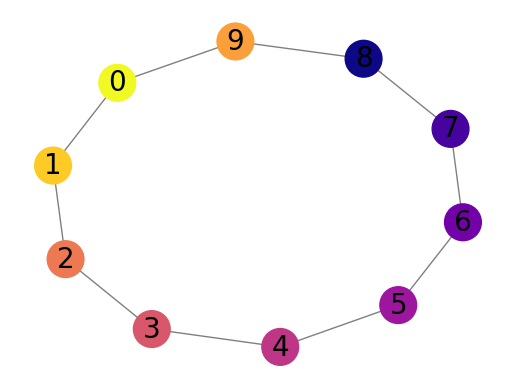

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[] for _ in range(vertices)]
    
    def add_edge(self, u, v):
        if v not in self.graph[u] and u != v:
            self.graph[u].append(v)
            self.graph[v].append(u)
    
    def print_graph(self):
        for i in range(self.V):
            print(f"{i} --> {' '.join(map(str, self.graph[i]))}")

    def smallest_last_ordering(self):
        """
        Compute the smallest last ordering of vertices in the graph.
        Returns a list of vertices in that order.
        """
        degrees = [len(self.graph[i]) for i in range(self.V)]
        vertices = set(range(self.V))
        ordering = []
        temp_graph = [self.graph[i][:] for i in range(self.V)]

        while vertices:
            # Find the vertex with the smallest degree
            min_vertex = min(vertices, key=lambda x: degrees[x])
            ordering.append(min_vertex)
            vertices.remove(min_vertex)
            # Update degrees of neighbors
            for neighbor in temp_graph[min_vertex]:
                degrees[neighbor] -= 1
            # Remove all edges of this vertex
            temp_graph[min_vertex] = []
        
        ordering.reverse()  # Reverse to make it smallest last
        return ordering

    def plot_graph(self, ordering=None):
        """
        Plot the graph using Matplotlib and NetworkX.
        Optionally highlight an ordering of the vertices.
        """
        G_nx = nx.Graph()
        for u in range(self.V):
            G_nx.add_node(u)
            for v in self.graph[u]:
                if u < v:  # add each edge only once
                    G_nx.add_edge(u, v)

        pos = nx.spring_layout(G_nx)  # positions for all nodes
        colors = range(self.V) if not ordering else [ordering.index(i) for i in range(self.V)]

        # nodes
        nx.draw_networkx_nodes(G_nx, pos, node_color=colors, node_size=700, cmap=plt.cm.plasma)

        # edges
        nx.draw_networkx_edges(G_nx, pos, width=1.0, alpha=0.5)

        # labels
        nx.draw_networkx_labels(G_nx, pos, font_size=20, font_family="sans-serif")

        plt.axis('off')  # Turn off the axis
        plt.show()

# Example creation and usage
g = Graph(10)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 7)
g.add_edge(7, 8)
g.add_edge(8, 9)
g.add_edge(9, 0)

ordering = g.smallest_last_ordering()
g.plot_graph(ordering)


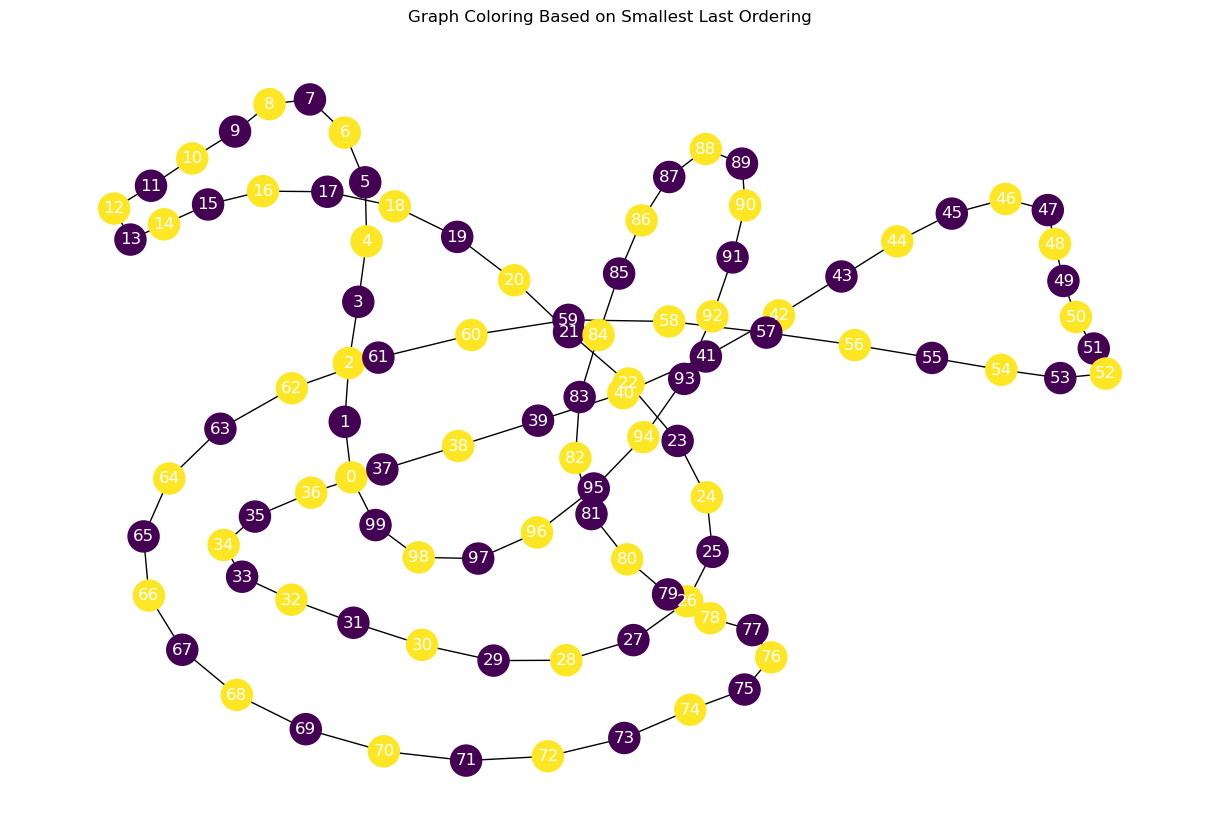

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = []
        self.V = 0  # Number of vertices will be determined based on the input file
    
    def add_edge(self, u, v):
        max_index = max(u, v)
        while max_index >= len(self.graph):
            self.graph.append([])
        if v not in self.graph[u]:
            self.graph[u].append(v)
            self.graph[v].append(u)
    
    def read_graph_from_file(self, filename):
        with open(filename, 'r') as file:
            self.graph = []  # Reset graph
            for line in file:
                parts = line.split(':')
                v = int(parts[0].strip())
                if parts[1].strip():
                    adjacents = list(map(int, parts[1].split()))
                    for u in adjacents:
                        self.add_edge(v, u)
        self.V = len(self.graph)  # Update number of vertices

    def smallest_last_ordering(self):
        import heapq
        
        degrees = [len(adj) for adj in self.graph]
        min_heap = [(degree, i) for i, degree in enumerate(degrees)]
        heapq.heapify(min_heap)
        last_vertex_order = []
        removed = [False] * self.V
        removal_step = 0
        
        while min_heap:
            while min_heap:
                degree, vertex = heapq.heappop(min_heap)
                if not removed[vertex]:
                    break
            
            removed[vertex] = True
            last_vertex_order.append(vertex)

            for neighbor in self.graph[vertex]:
                if not removed[neighbor]:
                    degrees[neighbor] -= 1
                    heapq.heappush(min_heap, (degrees[neighbor], neighbor))
        
        last_vertex_order.reverse()
        return last_vertex_order

    def color_graph_slo(self, order):
        color_assignment = {}
        available_colors = [True] * self.V
        
        for vertex in order:
            used_colors = [color_assignment.get(neighbor) for neighbor in self.graph[vertex] if neighbor in color_assignment]
            color = 0
            while color in used_colors:
                color += 1
            color_assignment[vertex] = color

        return color_assignment

def plot_colored_graph(graph, colors):
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(graph.V))
    for v, adj_list in enumerate(graph.graph):
        for u in adj_list:
            if u > v:
                G_nx.add_edge(v, u)

    pos = nx.spring_layout(G_nx)
    color_map = [colors[node] for node in G_nx.nodes()]
    
    plt.figure(figsize=(12, 8))
    nx.draw(G_nx, pos, node_color=color_map, with_labels=True, cmap=plt.cm.viridis, node_size=500, font_color='white')
    plt.title('Graph Coloring Based on Smallest Last Ordering')
    plt.show()

# Usage (example code block for users to run in their environment):
g = Graph()
g.read_graph_from_file("output_cycle_graph.txt")  # Provide the filename with pre-generated graph data
order = g.smallest_last_ordering()
colors = g.color_graph_slo(order)
plot_colored_graph(g, colors)


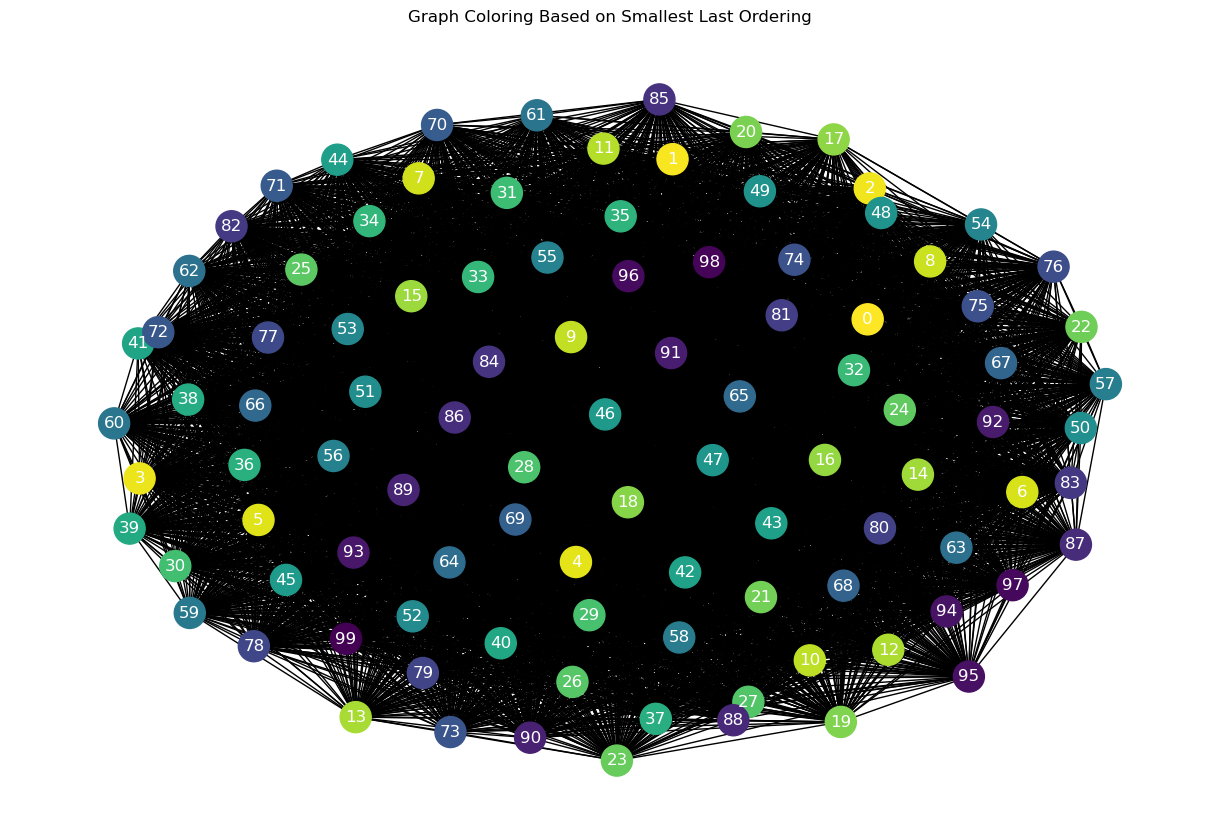

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = []
        self.V = 0  # Number of vertices will be determined based on the input file
    
    def add_edge(self, u, v):
        max_index = max(u, v)
        while max_index >= len(self.graph):
            self.graph.append([])
        if v not in self.graph[u]:
            self.graph[u].append(v)
            self.graph[v].append(u)
    
    def read_graph_from_file(self, filename):
        with open(filename, 'r') as file:
            self.graph = []  # Reset graph
            for line in file:
                parts = line.split(':')
                v = int(parts[0].strip())
                if parts[1].strip():
                    adjacents = list(map(int, parts[1].split()))
                    for u in adjacents:
                        self.add_edge(v, u)
        self.V = len(self.graph)  # Update number of vertices

    def smallest_last_ordering(self):
        import heapq
        
        degrees = [len(adj) for adj in self.graph]
        min_heap = [(degree, i) for i, degree in enumerate(degrees)]
        heapq.heapify(min_heap)
        last_vertex_order = []
        removed = [False] * self.V
        removal_step = 0
        
        while min_heap:
            while min_heap:
                degree, vertex = heapq.heappop(min_heap)
                if not removed[vertex]:
                    break
            
            removed[vertex] = True
            last_vertex_order.append(vertex)

            for neighbor in self.graph[vertex]:
                if not removed[neighbor]:
                    degrees[neighbor] -= 1
                    heapq.heappush(min_heap, (degrees[neighbor], neighbor))
        
        last_vertex_order.reverse()
        return last_vertex_order

    def color_graph_slo(self, order):
        color_assignment = {}
        available_colors = [True] * self.V
        
        for vertex in order:
            used_colors = [color_assignment.get(neighbor) for neighbor in self.graph[vertex] if neighbor in color_assignment]
            color = 0
            while color in used_colors:
                color += 1
            color_assignment[vertex] = color

        return color_assignment

def plot_colored_graph(graph, colors):
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(graph.V))
    for v, adj_list in enumerate(graph.graph):
        for u in adj_list:
            if u > v:
                G_nx.add_edge(v, u)

    pos = nx.spring_layout(G_nx)
    color_map = [colors[node] for node in G_nx.nodes()]
    
    plt.figure(figsize=(12, 8))
    nx.draw(G_nx, pos, node_color=color_map, with_labels=True, cmap=plt.cm.viridis, node_size=500, font_color='white')
    plt.title('Graph Coloring Based on Smallest Last Ordering')
    plt.show()

# Usage (example code block for users to run in their environment):
g = Graph()
g.read_graph_from_file("output_complete_graph.txt")  # Provide the filename with pre-generated graph data
order = g.smallest_last_ordering()
colors = g.color_graph_slo(order)
plot_colored_graph(g, colors)


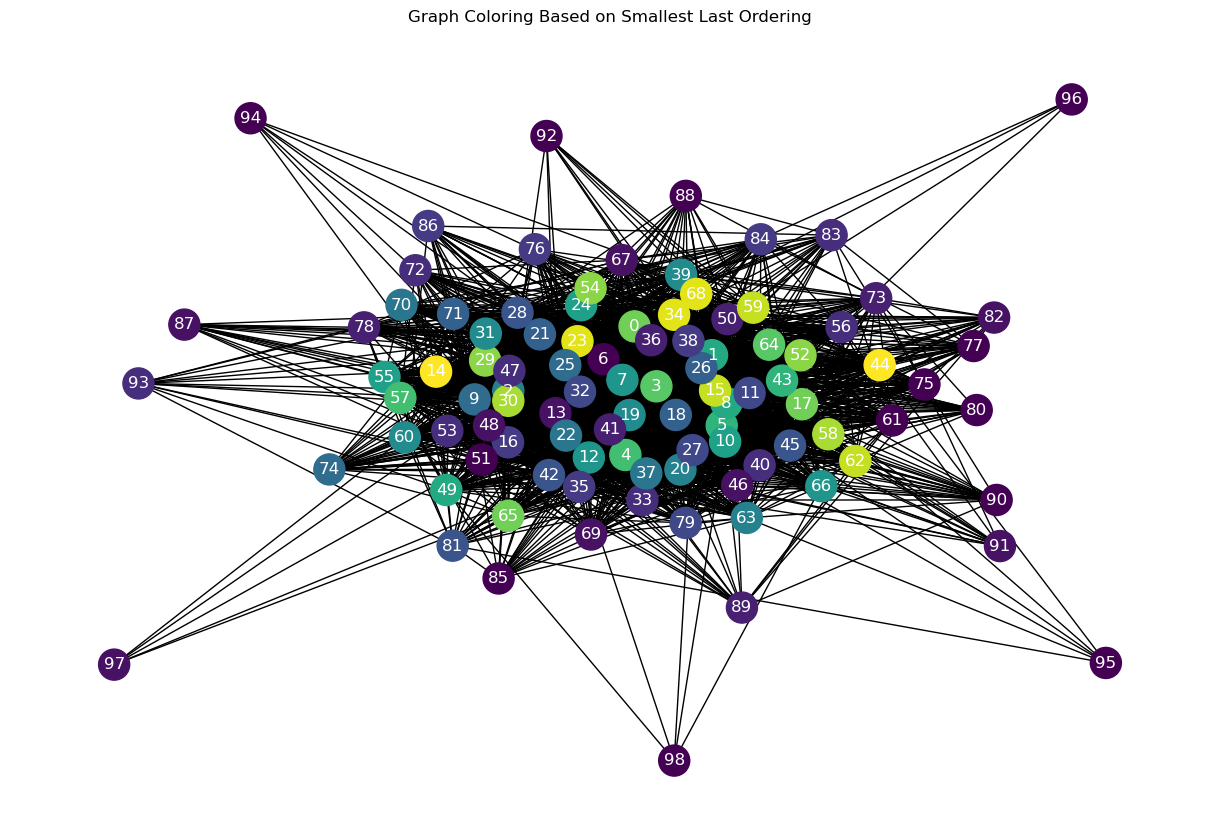

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = []
        self.V = 0  # Number of vertices will be determined based on the input file
    
    def add_edge(self, u, v):
        max_index = max(u, v)
        while max_index >= len(self.graph):
            self.graph.append([])
        if v not in self.graph[u]:
            self.graph[u].append(v)
            self.graph[v].append(u)
    
    def read_graph_from_file(self, filename):
        with open(filename, 'r') as file:
            self.graph = []  # Reset graph
            for line in file:
                parts = line.split(':')
                v = int(parts[0].strip())
                if parts[1].strip():
                    adjacents = list(map(int, parts[1].split()))
                    for u in adjacents:
                        self.add_edge(v, u)
        self.V = len(self.graph)  # Update number of vertices

    def smallest_last_ordering(self):
        import heapq
        
        degrees = [len(adj) for adj in self.graph]
        min_heap = [(degree, i) for i, degree in enumerate(degrees)]
        heapq.heapify(min_heap)
        last_vertex_order = []
        removed = [False] * self.V
        removal_step = 0
        
        while min_heap:
            while min_heap:
                degree, vertex = heapq.heappop(min_heap)
                if not removed[vertex]:
                    break
            
            removed[vertex] = True
            last_vertex_order.append(vertex)

            for neighbor in self.graph[vertex]:
                if not removed[neighbor]:
                    degrees[neighbor] -= 1
                    heapq.heappush(min_heap, (degrees[neighbor], neighbor))
        
        last_vertex_order.reverse()
        return last_vertex_order

    def color_graph_slo(self, order):
        color_assignment = {}
        available_colors = [True] * self.V
        
        for vertex in order:
            used_colors = [color_assignment.get(neighbor) for neighbor in self.graph[vertex] if neighbor in color_assignment]
            color = 0
            while color in used_colors:
                color += 1
            color_assignment[vertex] = color

        return color_assignment

def plot_colored_graph(graph, colors):
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(graph.V))
    for v, adj_list in enumerate(graph.graph):
        for u in adj_list:
            if u > v:
                G_nx.add_edge(v, u)

    pos = nx.spring_layout(G_nx)
    color_map = [colors[node] for node in G_nx.nodes()]
    
    plt.figure(figsize=(12, 8))
    nx.draw(G_nx, pos, node_color=color_map, with_labels=True, cmap=plt.cm.viridis, node_size=500, font_color='white')
    plt.title('Graph Coloring Based on Smallest Last Ordering')
    plt.show()

# Usage (example code block for users to run in their environment):
g = Graph()
g.read_graph_from_file("output_random_uniform.txt")  # Provide the filename with pre-generated graph data
order = g.smallest_last_ordering()
colors = g.color_graph_slo(order)
plot_colored_graph(g, colors)
